In [1]:
%matplotlib inline

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
from astropy.table import join
from desitarget.targets import desi_mask
from collections import Counter

In [7]:
truth_file = "/home/forero/Data/desitest/mtl/truth.fits"
sky_file = "/home/forero/Data/desitest/mtl/sky.fits"
star_file =  "/home/forero/Data/desitest/mtl/stdstars.fits"

truth = Table.read(truth_file)
sky = Table.read(sky_file)
star = Table.read(star_file)
true_types = list(set(truth['TRUETYPE']))

In [40]:
def print_stats_mtl(base_path="./", n_epoch=6):
    print("MTL EFFICIENCIES")
    print("================")
    for j in range(n_epoch):
        print('PASS {}'.format(j))
        mtl_file = base_path+"{}/mtl.fits".format(j)
        mtl = Table.read(mtl_file)
        
        ii = (mtl['DESI_TARGET'] & desi_mask.QSO) != 0
        n = len(mtl['NUMOBS_MORE'][ii])
        if j == 0: n_qso = n
        print('\t QSO f_unobs:{} - {}'.format(1.0*n/n_qso, Counter(mtl['NUMOBS_MORE'][ii])))
    
        ii = (mtl['DESI_TARGET'] & desi_mask.ELG) != 0
        n = len(mtl['NUMOBS_MORE'][ii])
        if j == 0: n_elg = n
        print('\t ELG f_unobs:{} - {}'.format(1.0*n/n_elg, Counter(mtl['NUMOBS_MORE'][ii])))
    
        ii = (mtl['DESI_TARGET'] & desi_mask.LRG) != 0
        n = len(mtl['NUMOBS_MORE'][ii])
        if j == 0: n_lrg = n
        print('\t LRG f_unobs:{} - {}'.format(1.0*n/n_lrg, Counter(mtl['NUMOBS_MORE'][ii])))
    
        ii = (mtl['DESI_TARGET'] & desi_mask.SKY) != 0
        print('SKY {}'.format(Counter(mtl['NUMOBS_MORE'][ii])))

        
def print_stats_zcat(base_path="./", n_epoch = 6):
    print("TARGETTING EFFICIENCIES")
    print("=======================")

    for epoch in range(n_epoch):
        zcat_file = base_path+"{}/zcat.fits".format(epoch)
        zcat = Table.read(zcat_file)
        print('Epoch {}'.format(epoch))
        for true_type in true_types:
            ii = (zcat['TYPE'] == true_type)
            jj = (truth['TRUETYPE'] == true_type)
            n_obs  = 1.0 * len(zcat['Z'][ii])
            n_total = 1.0 * len(truth['TRUEZ'][jj])
            print("\t {} : {}".format(true_type, n_obs/n_total))

In [41]:
base_path = "/home/forero/Data/desitest/lowfat_serial/"
print_stats_mtl(base_path=base_path)
print_stats_zcat(base_path=base_path)

MTL EFFICIENCIES
PASS 0
	 QSO f_unobs:1.0 - Counter({4: 253526})
	 ELG f_unobs:1.0 - Counter({1: 2354756})
	 LRG f_unobs:1.0 - Counter({2: 339668})
SKY Counter()
PASS 1
	 QSO f_unobs:0.906068805566 - Counter({1: 192815, 2: 15642, 3: 11504, 4: 9751})
	 ELG f_unobs:0.906654872097 - Counter({1: 1793767, 2: 145922, 3: 105495, 4: 89767})
	 LRG f_unobs:0.906305568967 - Counter({1: 258712, 2: 21025, 3: 15066, 4: 13040})
SKY Counter()
PASS 2
	 QSO f_unobs:0.763819095477 - Counter({1: 159432, 2: 14942, 3: 11414, 4: 7860})
	 ELG f_unobs:0.764749298866 - Counter({1: 1484059, 2: 138480, 3: 105695, 4: 72564})
	 LRG f_unobs:0.763460202315 - Counter({1: 213721, 2: 19850, 3: 15184, 4: 10568})
SKY Counter()
PASS 3
	 QSO f_unobs:0.679776433186 - Counter({1: 139687, 2: 14026, 3: 11864, 4: 6764})
	 ELG f_unobs:0.680270057704 - Counter({1: 1300015, 2: 130051, 3: 109822, 4: 61982})
	 LRG f_unobs:0.67878045621 - Counter({1: 187099, 2: 18680, 3: 15738, 4: 9043})
SKY Counter()
PASS 4
	 QSO f_unobs:0.6231392441

In [42]:
base_path = "/home/forero/Data/desitest/lowfat/"
print_stats_mtl(base_path=base_path)
print_stats_zcat(base_path=base_path)

MTL EFFICIENCIES
PASS 0
	 QSO f_unobs:1.0 - Counter({4: 253526})
	 ELG f_unobs:1.0 - Counter({1: 2354756})
	 LRG f_unobs:1.0 - Counter({2: 339668})
SKY Counter()
PASS 1
	 QSO f_unobs:0.919452048311 - Counter({1: 195566, 2: 16795, 3: 14517, 4: 6227})
	 ELG f_unobs:0.91962182069 - Counter({1: 1818519, 2: 156078, 3: 132896, 4: 57992})
	 LRG f_unobs:0.919698058104 - Counter({1: 262430, 2: 22492, 3: 19108, 4: 8362})
SKY Counter()
PASS 2
	 QSO f_unobs:0.776685625932 - Counter({1: 162907, 2: 16222, 3: 12977, 4: 4804})
	 ELG f_unobs:0.77789673325 - Counter({1: 1517588, 2: 149276, 3: 120062, 4: 44831})
	 LRG f_unobs:0.776437580225 - Counter({1: 218584, 2: 21384, 3: 17287, 4: 6476})
SKY Counter()
PASS 3
	 QSO f_unobs:0.688233159518 - Counter({1: 142453, 2: 14606, 3: 13428, 4: 3998})
	 ELG f_unobs:0.689941972756 - Counter({1: 1329601, 2: 134424, 3: 123556, 4: 37064})
	 LRG f_unobs:0.68874312564 - Counter({1: 191441, 2: 19345, 3: 17837, 4: 5321})
SKY Counter()
PASS 4
	 QSO f_unobs:0.626772007605 -

In [20]:
import glob
tile_files = glob.glob('/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile*.fits')
print len(tile_files)

144


In [21]:
fiberdata = Table.read(tile_files[0], hdu=1)
print fiberdata.colnames
print truth.colnames
print zcat.colnames

['FIBER', 'POSITIONER', 'NUMTARGET', 'PRIORITY', 'TARGETID', 'DESI_TARGET', 'BGS_TARGET', 'MWS_TARGET', 'RA', 'DEC', 'XFOCAL_DESIGN', 'YFOCAL_DESIGN']
['TARGETID', 'BRICKNAME', 'RA', 'DEC', 'TRUEZ', 'TRUETYPE', 'CATEGORY']
['TARGETID', 'BRICKNAME', 'Z', 'TYPE', 'NUMOBS', 'ZERR', 'ZWARN']


In [23]:
n_tiles = 20
n_star_all = []
n_sky_all = []
n_targets_all = []
for i in range(n_tiles):
    print tile_files[i]
    fiberdata = Table.read(tile_files[i], hdu=1)
    n_star = len(set(fiberdata['TARGETID']) & set(star['TARGETID']))
    n_sky = len(set(fiberdata['TARGETID']) & set(sky['TARGETID']))
    n_targets = len(set(fiberdata['TARGETID']) & set(truth['TARGETID']))
    n_star_all.append(n_star)
    n_sky_all.append(n_sky)
    n_targets_all.append(n_targets)

/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02791.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02802.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05394.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05469.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05425.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02780.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_03394.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05429.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05420.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_00139.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02763.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05461.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_02814.fits
/home/forero/Data/desitest/lowfat_serial/0/fiberassign/tile_05391.fits
/home/

In [44]:
print n_targets_all
print n_sky_all
print n_star_all

[4489, 4489, 4485, 4490, 4493, 4491, 2103, 4491, 4490, 2248, 4494, 4488, 4492, 2250, 4488, 4482, 4490, 4490, 4490, 2247]
[400, 400, 400, 400, 400, 400, 201, 400, 400, 202, 400, 400, 400, 202, 400, 400, 400, 400, 400, 204]
[100, 100, 100, 100, 100, 100, 50, 100, 100, 50, 100, 100, 100, 50, 100, 100, 100, 100, 100, 50]


In [47]:
 fiberdata = Table.read(tile_files[6], hdu=1)

[False False False ...,  True  True  True]


/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


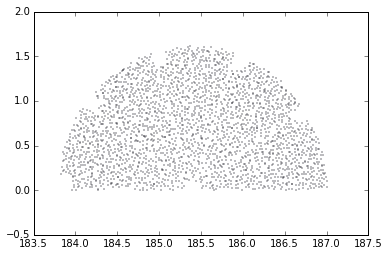

In [122]:
ii = (fiberdata['TARGETID'] >= 0)
plt.scatter(fiberdata['RA'][ii], fiberdata['DEC'][ii], s=0.1)

In [139]:
def compare_fibermaps(base_path_A="./", base_path_B="./", tile_id=0, epoch=0):
    fiber_file_A = "%s/%d/fiberassign/tile_%05d.fits"%(base_path_A, epoch, tile_id)
    fiber_file_B = "%s/%d/fiberassign/tile_%05d.fits"%(base_path_B, epoch, tile_id)

    fiberdata_A = Table.read(fiber_file_A, hdu=1)
    fiberdata_B = Table.read(fiber_file_B, hdu=1)

    ii_A = (fiberdata_A['TARGETID'] > 0)
    ii_B = (fiberdata_B['TARGETID'] > 0)
    intersection = list(set(fiberdata_A['TARGETID'][ii_A]) & set(fiberdata_B['TARGETID'][ii_B]))
    
    n_A = len(fiberdata_A['TARGETID'][ii_A])
    n_B = len(fiberdata_B['TARGETID'][ii_B])
    return 1.0*n_A/n_B, 1.0*len(intersection)/n_A


In [153]:
epoch  = 5
base_path_A = "/home/forero/Data/desitest/lowfat_serial/"
base_path_B = "/home/forero/Data/desitest/lowfat/"

tile_files = glob.glob('{}/{}/fiberassign/tile*.fits'.format(base_path_A, epoch))
tile_id_list = []
for tile in tile_files:
    tilename = tile.split('/')[-1]
    tile_id_list.append(int(tilename.split('.')[0].split('_')[-1]))
tile_id_list.sort()
#print tile_id_list


ratio_used = []
ratio_intersection = []
for tile_id in tile_id_list:
    used, intersec = compare_fibermaps(base_path_A=base_path_A, base_path_B=base_path_B, tile_id=tile_id, epoch=epoch)
    ratio_used.append(used)
    ratio_intersection.append(intersec)

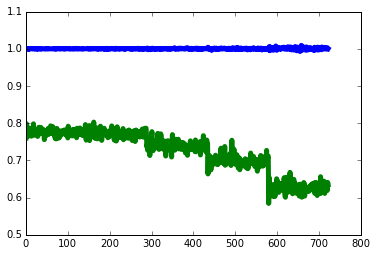

In [155]:
plt.plot(ratio_used, lw=5)
plt.plot(ratio_intersection, lw=5)